# Exercise 2 (Python For Science)

# Problem 1

Write a function to calculate cubic polynomial over some range of the independent
variable.
    
    a) Generate the data and recover (fit) the coefficients.

    b) Now add standard gaussian noise. Again fit the coefficients.

    c) Change the amplitude of the noise to add to the data and plot how it
    affects the recovery of the coefficients.

    d) Now try to fit the cubic polynomial data with quadratic polynomial.
    Find out the distance between the fit and actual data.

(Hint: polyfit)

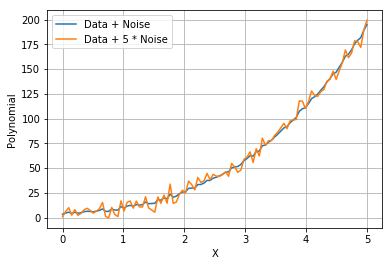

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a, b, c, d = [1, 2, 3, 4]

def cubic_poly(x):
    global a, b, c, d
    return a * x ** 3 + b * x ** 2 + c * x + d

def quadr_poly(y, coeff):
    a = coeff[0]
    b = coeff[1]
    c = coeff[2]
    return a * y ** 2 + b * y + c
    
x = np.linspace(0, 5, 100)
poly_x = cubic_poly(x)
fit_coeff_def = np.polyfit(x, poly_x, 3)

noise_x = np.random.normal(size=len(poly_x))
new_poly_x = noise_x + poly_x
fit_coeff = np.polyfit(x, new_poly_x, 3)
new_poly_x2 = 5 * noise_x + poly_x
fit_coeff2 = np.polyfit(x, new_poly_x2, 3)

plt.plot(x, new_poly_x, label="Data + Noise")
plt.plot(x, new_poly_x2, label="Data + 5 * Noise")
plt.xlabel("X")
plt.ylabel("Polynomial")
plt.legend()
plt.grid()
plt.show()
plt.close()

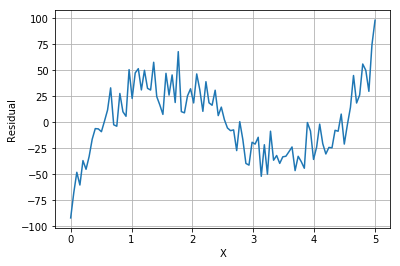

In [2]:
quadr_x = np.polyfit(x, poly_x, 2)
residual_x = new_poly_x - quadr_poly(x, coeff=quadr_x)

plt.plot(x, residual_x / np.mean(residual_x))
plt.xlabel("X")
plt.ylabel("Residual")
plt.grid()
plt.show()
plt.close()

# Problem 2

Read the time series data given the data file. For each time t, the time series
follows the Gaussian distribution.
    
    a) Using the data, find out the parameters of the Gaussian.
    (Hint: curve_fit, leastsq from scipy optimize)

    b) Create similar data using fitted parameters and compare them using histograms.

    c) Also calculate power spectral density (PSD) of the given time series data.



TimeSeries.txt


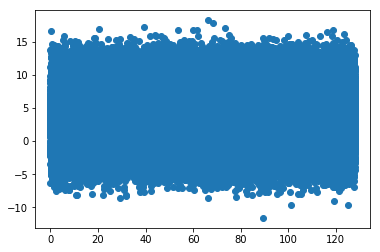

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# file_name = input("Enter The File Name For Time Series Analysis: ")
file_name = 'TimeSeries.txt'
print file_name

# Read The File
file_col = np.loadtxt(file_name)
col_1 = file_col[:, 0]
col_2 = file_col[:, 1]

# Scatter Plot File Data
plt.scatter(col_1, col_2)
plt.show()
plt.close()

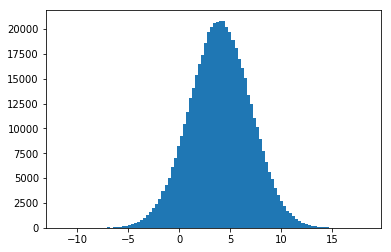

In [12]:
plt.hist(col_2, bins=100)
plt.show()
plt.close()

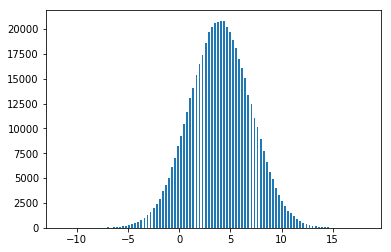

In [13]:
import matplotlib.mlab as mlab

n_hist, bins = np.histogram(col_2, bins=100)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, n_hist, align='center', width=width)
plt.show()
plt.close()

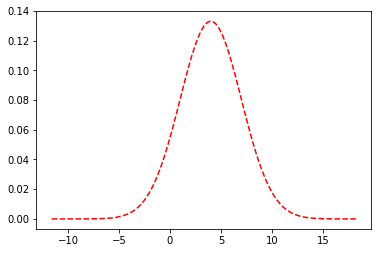

Mean = 4.00458916613
Sigma = 2.99728736294


In [14]:
# Fitting A Normalised PDF
from scipy.stats import norm

mean, sigma = norm.fit(col_2)
y = mlab.normpdf(bins, mean, sigma)
plt.plot(bins, y, 'r--')
plt.show()
plt.close()
print("Mean = {0}".format(mean))
print("Sigma = {0}".format(sigma))

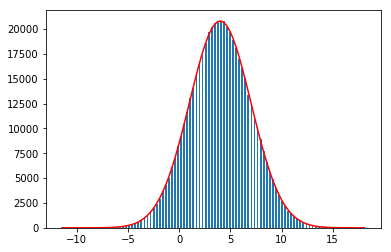

Parameters Of The Gaussian Are:
Mean = 4.006718085
Sigma = 4.23993849485


In [15]:
def gaussian_func(x, mean, sigma, const):
    return const * np.exp(-(x - mean) ** 2 / (sigma ** 2))

popt, pcov = curve_fit(gaussian_func, center, n_hist)
plt.bar(center, n_hist, align='center', width=width)
plt.plot(center, gaussian_func(center, *popt), color='r')
plt.show()
plt.close()

print("""Parameters Of The Gaussian Are:
Mean = {0}
Sigma = {1}""".format(*popt))

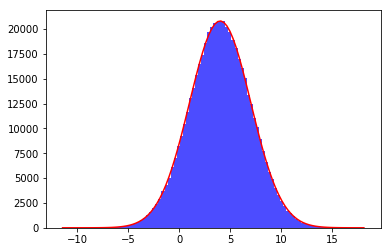

In [16]:
data_similar = gaussian_func(center, *popt)

plt.plot(center, data_similar, color='r')
plt.hist(col_2, bins=100, ls='dotted', fc=(0, 0, 1, 0.7))
plt.show()
plt.close()

plt.show()
plt.close()

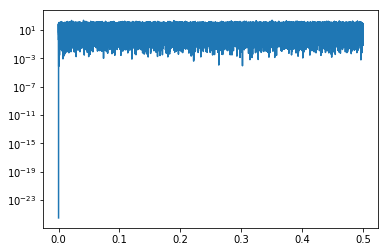

In [18]:
# Calculate power spectral density of the data
from scipy.signal import periodogram as scp

x, spec_y = scp(col_2, fs=1)
plt.semilogy(x, spec_y)
plt.show()
plt.close()

# Problem 3

Verify central limit theorem by adding 2, 5, 20, 50, 100 iid chi square variables
and considering sample of at least 1000.
    a) Also try to estimate the parameters of the distribution of these additions.

    b) Compare the variations of the different distribution from the actual distribution
    you are expecting from the fit.

    c) Do the same thing for uniform distribution.

    d) Does all of the above make any sense? Why?
(Hint: Use numpy.random)

In [16]:
import numpy as np
from scipy import stats

sample_size = 1000
add_array = np.array([2, 5, 20, 50, 100])
new_chi_array = np.zeros(len(add_array), dtype=object)

for index in range(0, len(add_array)):
    z = np.zeros(sample_size)
    for i in range(0, add_array[index]):
        z += np.random.chisquare(df=np.random.randint(1, 10), size=sample_size)
    new_chi_array[index] = z
    


# Problem 4

Read "planets.csv" using pandas to create DataFrame/Table with the exoplanet
data.
    a) Find out various methods used to detect exoplanets. So the dataframe
    based on detection method and masses of the exoplanets, Also then split the
    the dataframe into many, one for each detection method.

    b) For each of the dataframe corresponding to different detection methods,
    arrange exoplanets in ascending order of their masses.
    Combine these multiple dataframes into one preserving the order. Compare
    both the sorted dataframes.

    c) Find out all the parent stars having exoplanet with mass larger than 1
    jupiter mass, radius larger than jupiter radius. Plot the mass-radius plot
    for these particular parent stars with error bars

    (To understand splitting, indexing, hierarchical indexing, groupby, pivot_tables etc)
    (Help: http://pandas.pydata.org/pandas-docs/stable/merging.html;
    http://pandas.pydata.org/pandas-docs/stable/10min.html;
    http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html;
    also matplotlib)

    (Required col names:
    methods = "pl_discmethod"
    host star = "pl_host"
    planet mass (in 'Jupiter Mass' units) = "pl_bmassj"
    planet mass (in 'Jupiter Mass' units) upper/lower error limits = "pl_bmassjerr1"/"pl_bmassjerr2"
    host star mass (in Solar mass units) = "st_mass"
    host star mass (in Solar mass units) upper/lower error limits= "st_masserr1"/"st_masserr2"
    host star radius (in Solar radias units) = "st_rad"
host star mass (in Solar mass units) upper/lower error limits= "st_radserr1"/"st_raderr2")

In [ ]:
import pandas as pd